In [21]:
import numpy as np
import pandas as pd

df = pd.read_csv("Infection.csv")
df

Infection   CRP  Temp
0       Viral  40.0  36.0
1       Viral  11.1  37.2
2       Viral  30.0  36.5
3       Viral  21.4  39.4
4       Viral  10.7  39.6
5       Viral   3.4  40.7
6   Bacterial  42.0  37.6
7   Bacterial  31.1  42.2
8   Bacterial  50.0  38.5
9   Bacterial  60.4  39.4
10  Bacterial  45.7  38.6
11  Bacterial  17.3  42.7

In [22]:
df.columns

Index(['Infection', 'CRP', 'Temp'], dtype='object')

In [23]:
df['Infection'].unique()

array(['Viral', 'Bacterial'], dtype=object)

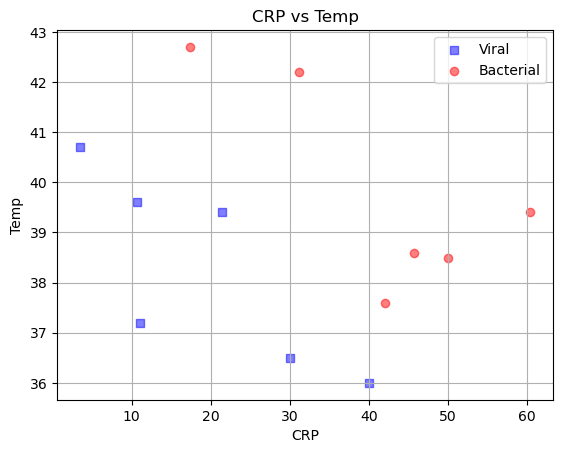

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
 
viral_data = df[df['Infection'] == 'Viral']
bacterial_data = df[df['Infection'] == 'Bacterial']
 
plt.scatter(x=viral_data['CRP'],
            y=viral_data['Temp'],
            marker='s',
            color='blue',
            alpha=0.5,
            label='Viral'
           )
plt.scatter(x=bacterial_data['CRP'],
            y=bacterial_data['Temp'],
            marker='o',
            color='red',
            alpha=0.5,
            label='Bacterial'
           )
 
plt.xlabel('CRP')
plt.ylabel('Temp')
plt.title('CRP vs Temp')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
total = df.iloc[:, 1:]
viral = df[df['Infection'] == 'Viral'].iloc[:, 1:]
bac = df[df['Infection'] == 'Bacterial'].iloc[:, 1:]

cov_v = np.cov(np.array((viral['CRP'], viral['Temp'])))
cov_b = np.cov(np.array((bac['CRP'], bac['Temp'])))
T = np.cov(np.array((total['CRP'], total['Temp'])))

W = (cov_v + cov_b) / 2
B = T - W

print("Within\n", W, "\n\nTotal\n", T, "\n\nBetween\n", B)

Within
 [[208.14  -22.463]
 [-22.463   4.067]] 

Total
 [[317.052 -10.974]
 [-10.974   4.395]] 

Between
 [[108.912  11.489]
 [ 11.489   0.328]]


In [26]:
S = (np.linalg.inv(W)).dot(B)
print(f"Separation\n{S}")

Separation
[[ 2.051  0.158]
 [14.153  0.955]]


In [27]:
from numpy.linalg import eig
np.set_printoptions(precision=3)
eigenvalues, eigenvectors = eig(S)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(f"Eigen values = {eigenvalues}\nEigen vectors\n{eigenvectors}")

Eigen values = [ 3.097 -0.091]
Eigen vectors
[[ 0.15  -0.074]
 [ 0.989  0.997]]


In [28]:
df['LDA_Score'] = df['CRP'] * eigenvectors[0][0] + df['Temp'] * eigenvectors[1][0]
df

Infection   CRP  Temp  LDA_Score
0       Viral  40.0  36.0  41.579448
1       Viral  11.1  37.2  38.442024
2       Viral  30.0  36.5  40.577655
3       Viral  21.4  39.4  42.158311
4       Viral  10.7  39.6  40.755163
5       Viral   3.4  40.7  40.750581
6   Bacterial  42.0  37.6  43.460672
7   Bacterial  31.1  42.2  46.378075
8   Bacterial  50.0  38.5  45.547474
9   Bacterial  60.4  39.4  47.993355
10  Bacterial  45.7  38.6  45.002997
11  Bacterial  17.3  42.7  44.807739

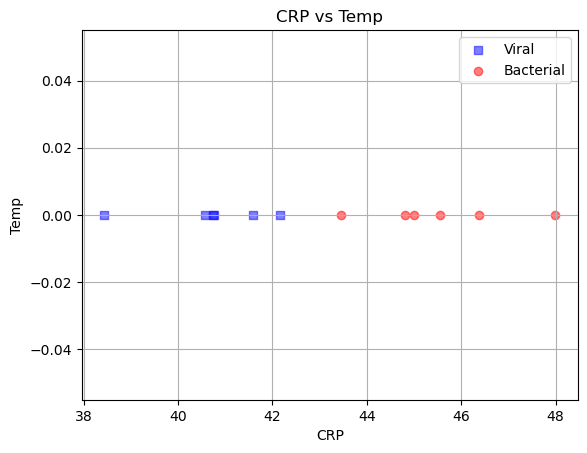

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
 
viral_data = df[df['Infection'] == 'Viral']
bacterial_data = df[df['Infection'] == 'Bacterial']
 
plt.scatter(x=viral_data['LDA_Score'],
            y=np.zeros_like(viral_data['LDA_Score']),
            marker='s',
            color='blue',
            alpha=0.5,
            label='Viral'
           )
plt.scatter(x=bacterial_data['LDA_Score'],
            y=np.zeros_like(bacterial_data['LDA_Score']),
            marker='o',
            color='red',
            alpha=0.5,
            label='Bacterial'
           )
 
plt.xlabel('CRP')
plt.ylabel('Temp')
plt.title('CRP vs Temp')
plt.legend()
plt.grid(True)
plt.show()